In [1]:
import torch
from torchvision.models import alexnet, AlexNet_Weights, vgg11, VGG11_Weights,resnet18, ResNet18_Weights
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torchvision
import math

In [12]:
'results/hi.png'[8:-4]

'hi'

In [18]:
def calculate_grid(n_plots):
    root = math.sqrt(n_plots)

    # If the square root is an integer, then we can create a square grid
    if root.is_integer():
        rows = columns = int(root)
    else:
        # If the square root is not an integer, then we create a grid that is as square as possible
        rows = math.floor(root)
        columns = math.ceil(n_plots / rows)

    return rows, columns


def save_filters(filters, filename):
    # show max of 64 filters so we can actually see on the
    n_filters = min(filters.shape[0], 64)
    rows, columns = calculate_grid(n_filters)

    fig = plt.figure(figsize=(8.5, 11))
    fig.suptitle(filename[8:-4])
    for i in range(1, n_filters +1):
        f = filters[i-1, 0, :, :]
        ax = fig.add_subplot(rows, columns, i)  # Create an Axes object
        ax.set_title(f'{i}')
        ax.set_xticks([])  #Turn off axis
        ax.set_yticks([])
        plt.imshow(f, cmap='gray')

    plt.tight_layout()
    plt.savefig(filename, format='png')


def save_features(img, filename, out_channels):
    rows, cols = calculate_grid(out_channels)

    fig = plt.figure(figsize=(8, 12))
    fig.suptitle(filename[8:-4])
    for i in range(1, out_channels+1):
        ftr = img[i-1, :, :].detach().numpy()
        ax = fig.add_subplot(rows, cols, i)
        ax.set_title(f'{i}')
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(ftr, cmap='gray')

    plt.tight_layout()
    plt.savefig(filename, format='png')


def viz_features_and_filters(model, basename, in_img, out_img):
    print(f'starting {basename}')

    ## save plots for 1st and last filters
    first_conv_idx = None
    last_conv_idx = None

    for i, layer in enumerate(model.features):
        if isinstance(layer, torch.nn.Conv2d):
            if first_conv_idx is None:
                first_conv_idx = i
            last_conv_idx = i

    print('first ', first_conv_idx, '\t last ', last_conv_idx)
    first_filters = model.features[first_conv_idx].weight.detach().numpy()
    last_filters = model.features[last_conv_idx].weight.detach().numpy()

    save_filters(first_filters, f'{basename}_first_filters.png')
    save_filters(last_filters, f'{basename}_last_filters.png')

    ## save plots for in_dist and out_dist image features at 1st and last conv layers
    for i, layer in enumerate(model.features):
        in_img = layer(in_img)
        out_img = layer(out_img)

        if i == first_conv_idx:
            save_features(in_img, f'{basename}_first_ftrs_in.png', 64)
            save_features(out_img, f'{basename}_first_ftrs_out.png', 64)

        elif i == last_conv_idx:

            save_features(in_img, f'{basename}_last_ftrs_in.png', 64)
            save_features(out_img, f'{basename}_last_ftrs_out.png', 64)

    print(f'done with {basename}')


/Users/vikram/.pyenv/versions/3.11.0/envs/mlsandbox/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


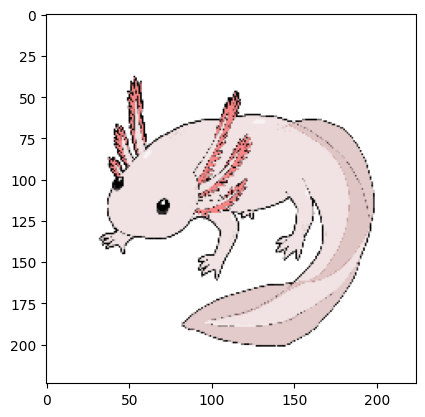

In [3]:
in_img = torch.from_numpy(np.array(Image.open('imagenet_robin.JPEG')))
out_img = torch.from_numpy(np.array(Image.open('out.png')))

# inputs should be [C, H, W] where H=W=224
in_img = in_img.permute(2, 0, 1)
out_img = out_img.permute(2, 0, 1)

in_img = torchvision.transforms.functional.resize(in_img, (224, 224))
out_img = torchvision.transforms.functional.resize(out_img, (224, 224))

plt.imshow(out_img.permute(1, 2, 0))
plt.show()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

/Users/vikram/.pyenv/versions/3.11.0/envs/mlsandbox/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


done with results/alex


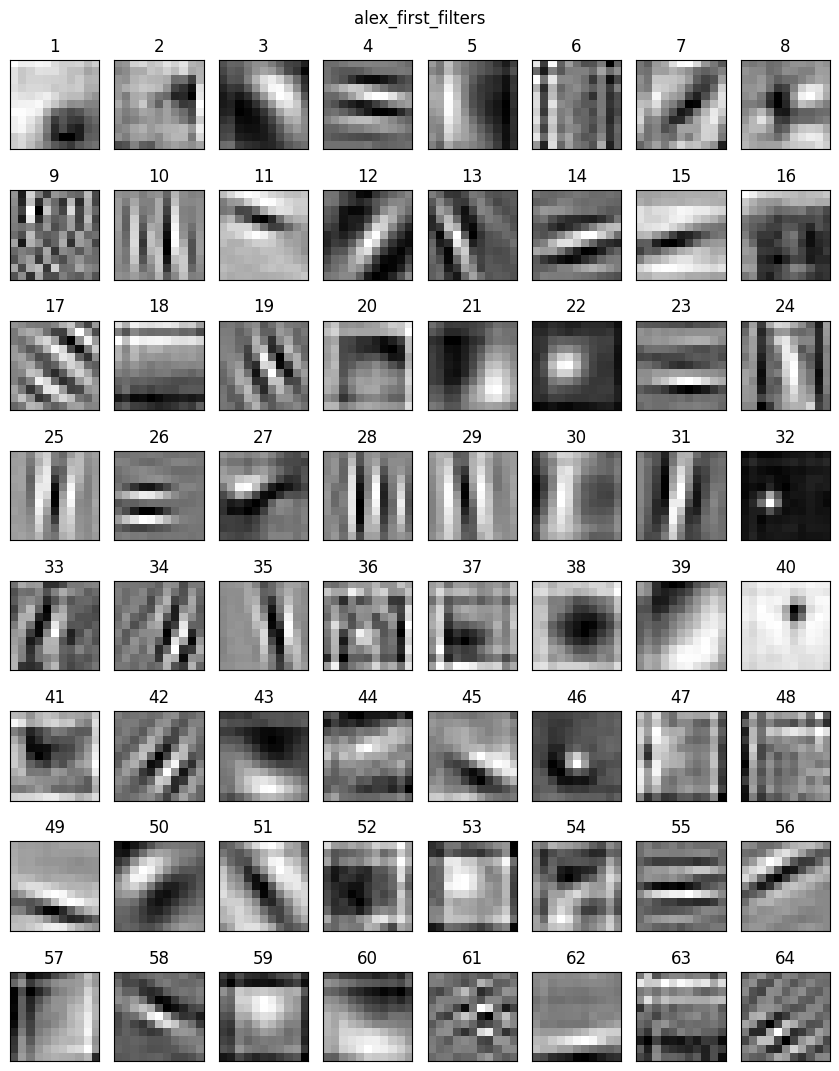

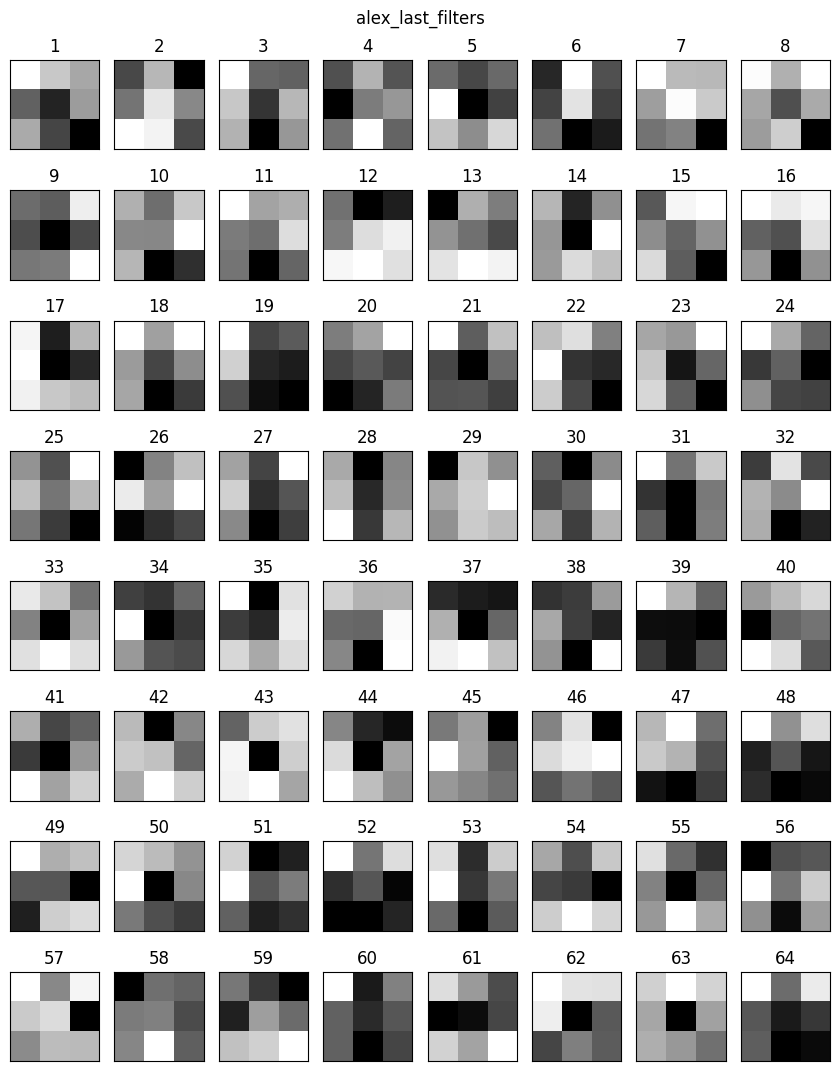

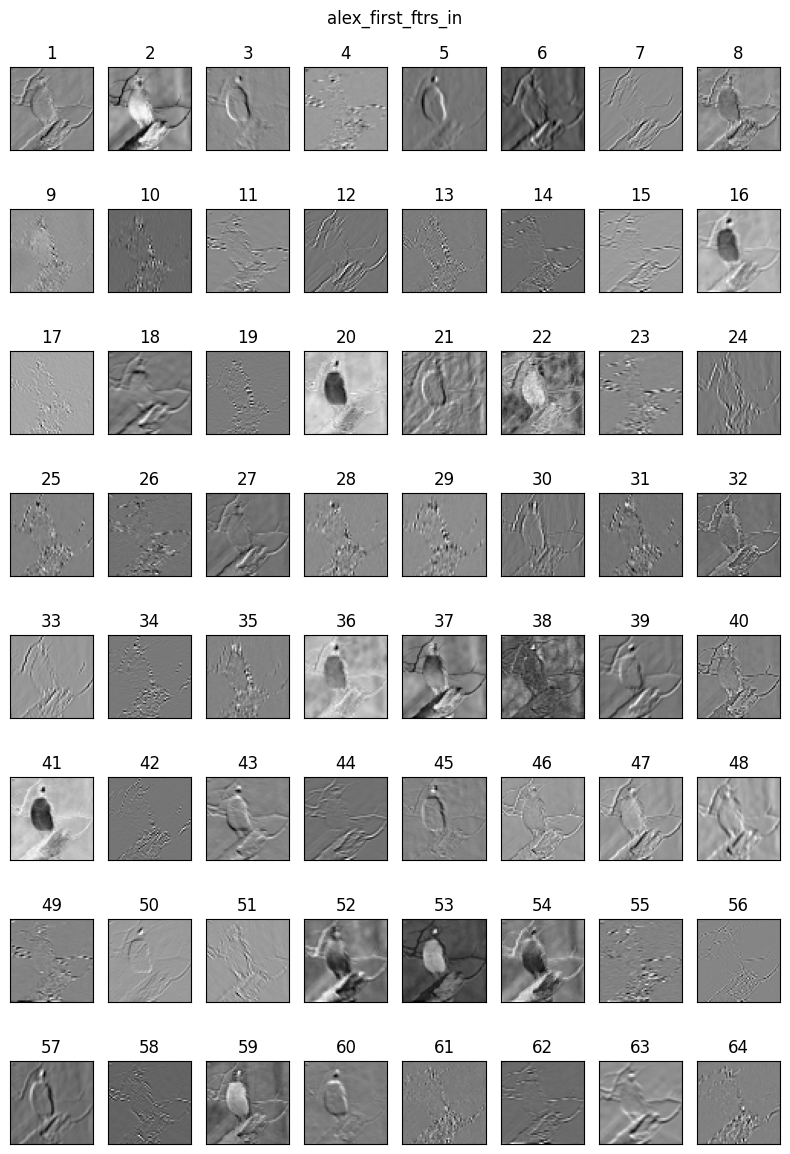

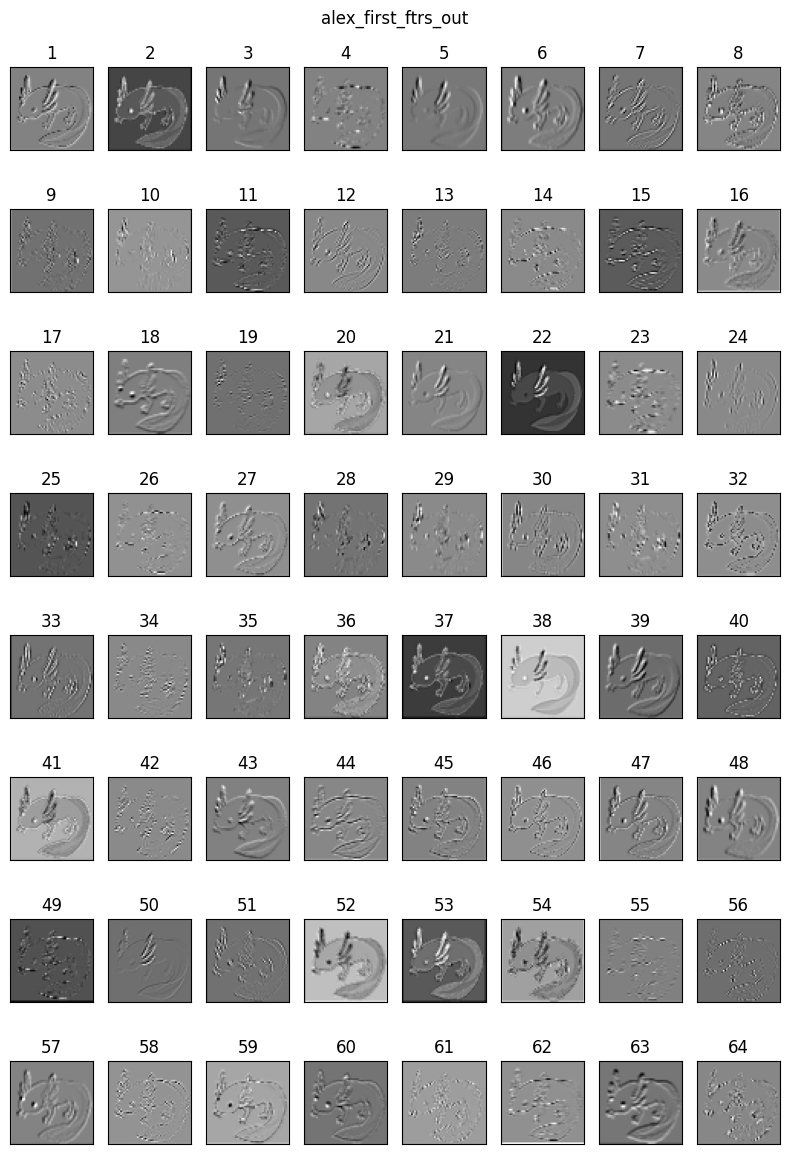

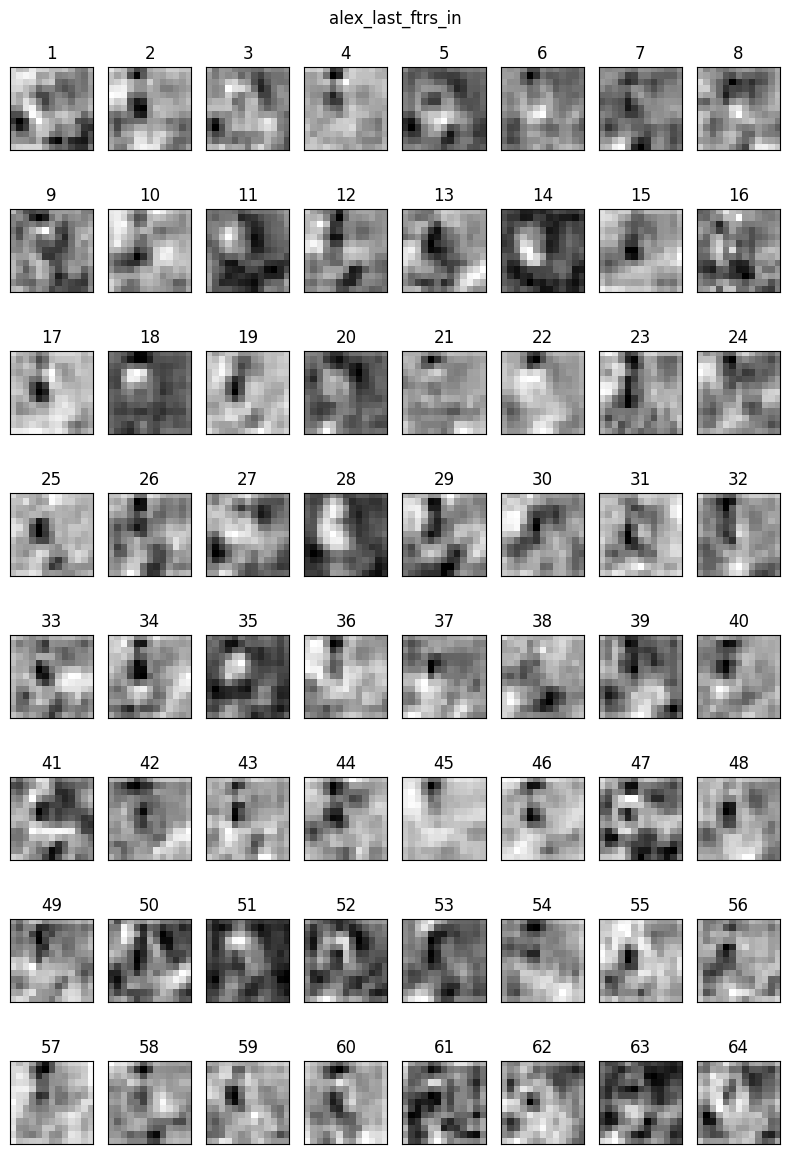

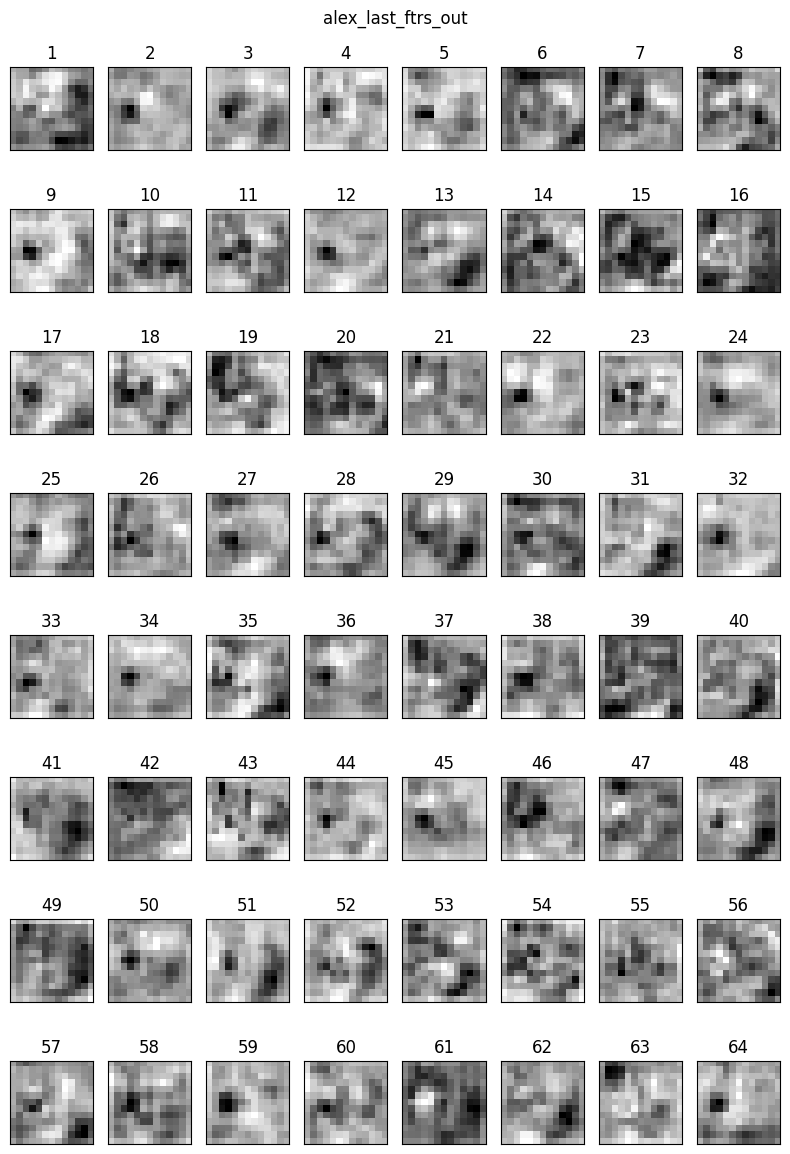

In [19]:
weights = AlexNet_Weights.IMAGENET1K_V1
alex_preprocess = weights.transforms()
alex = alexnet(weights=weights)
print(alex)
viz_features_and_filters(alex, 'results/alex', alex_preprocess(in_img), alex_preprocess(out_img))

starting results/vgg
first  0 	 last  18
done with results/vgg


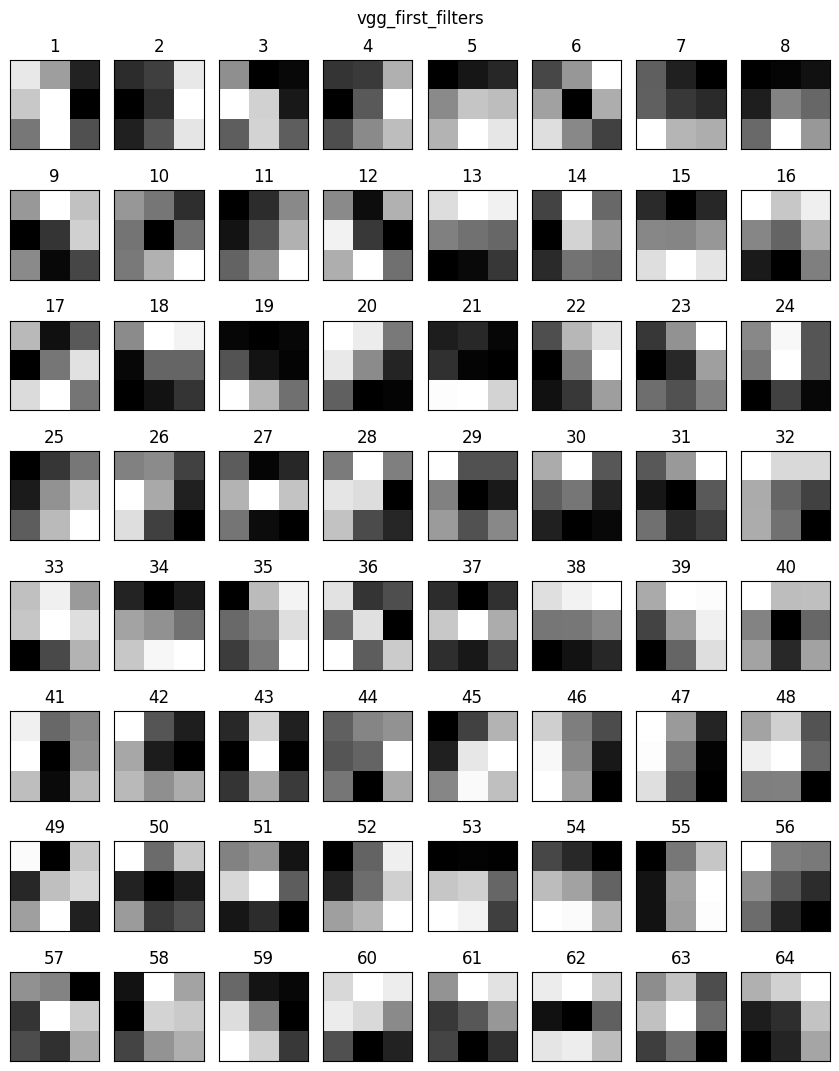

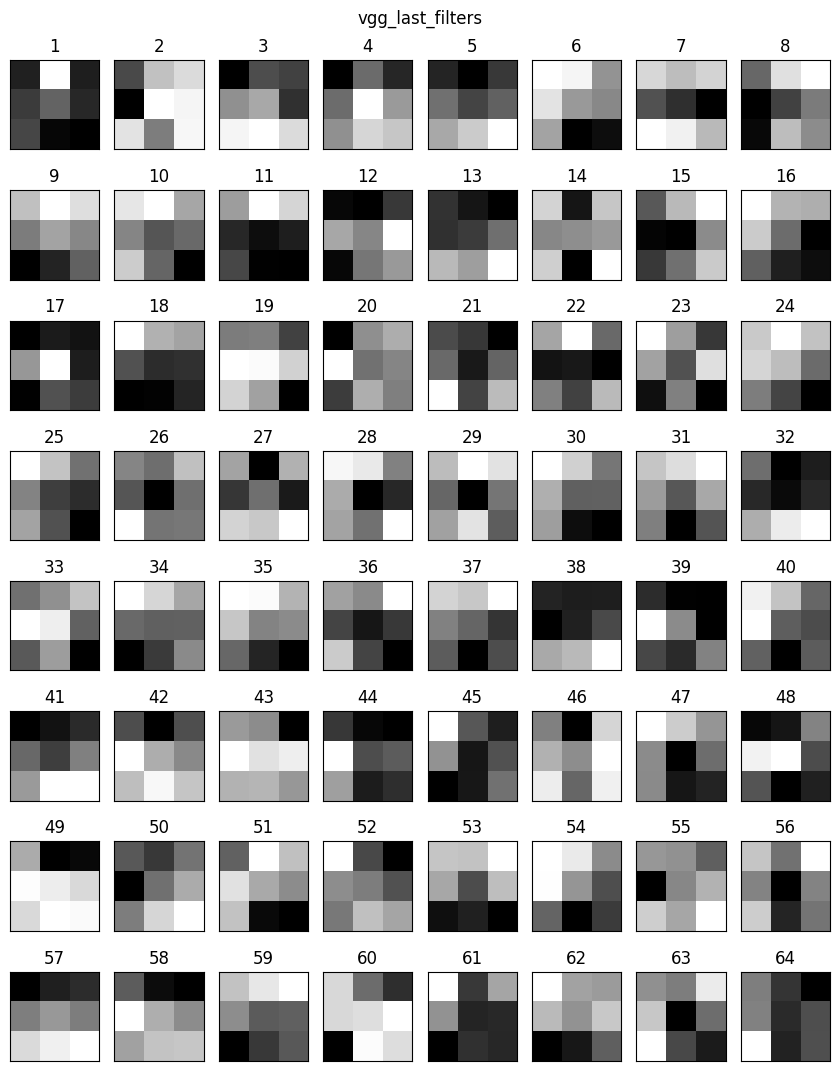

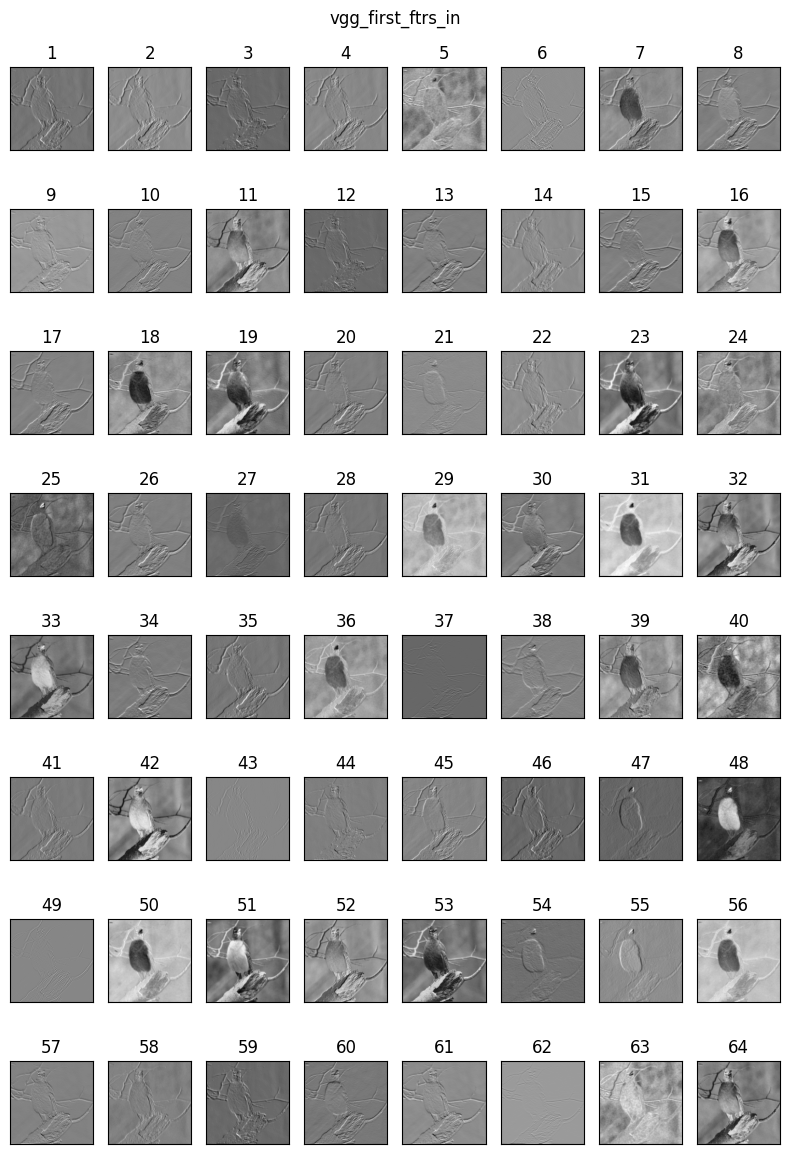

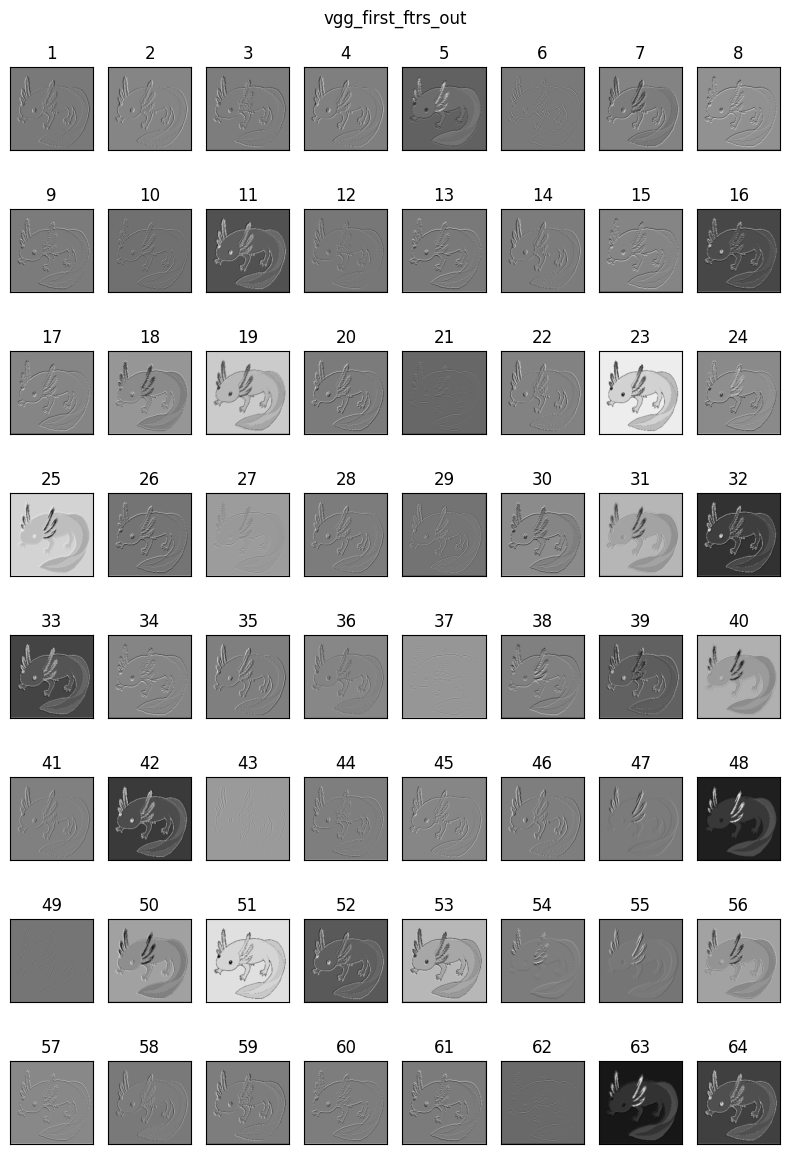

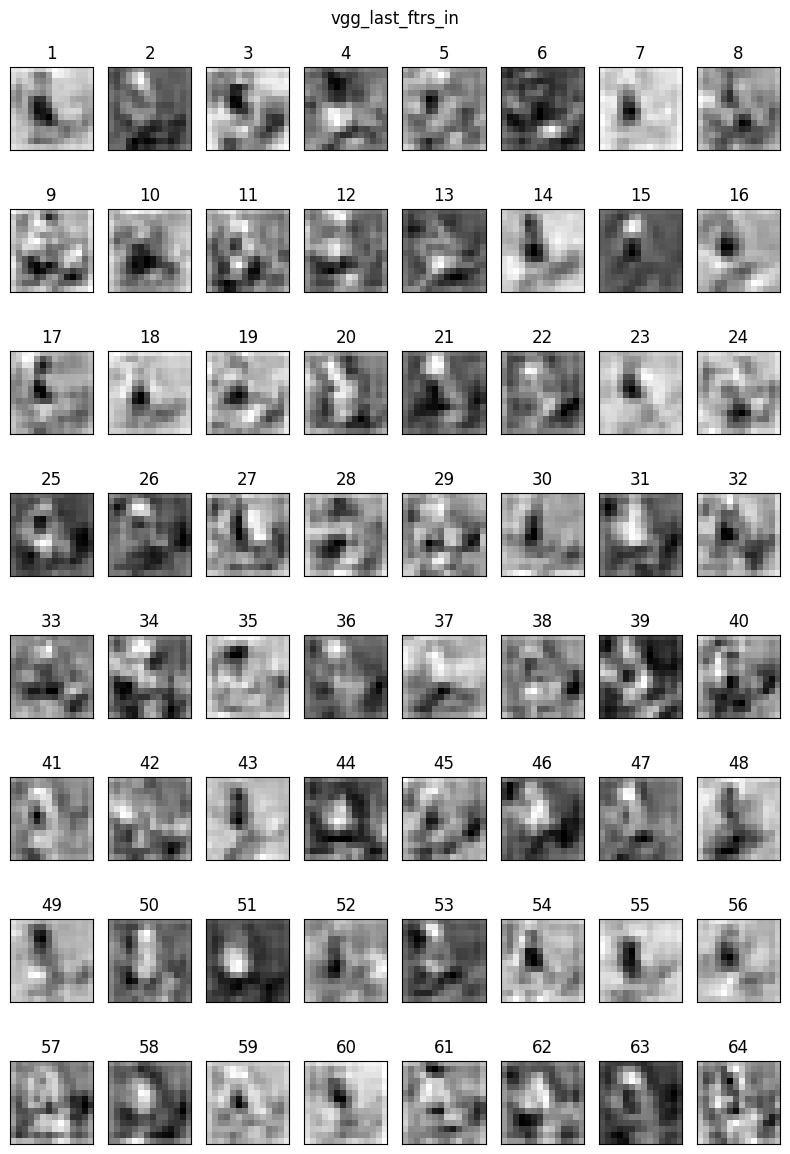

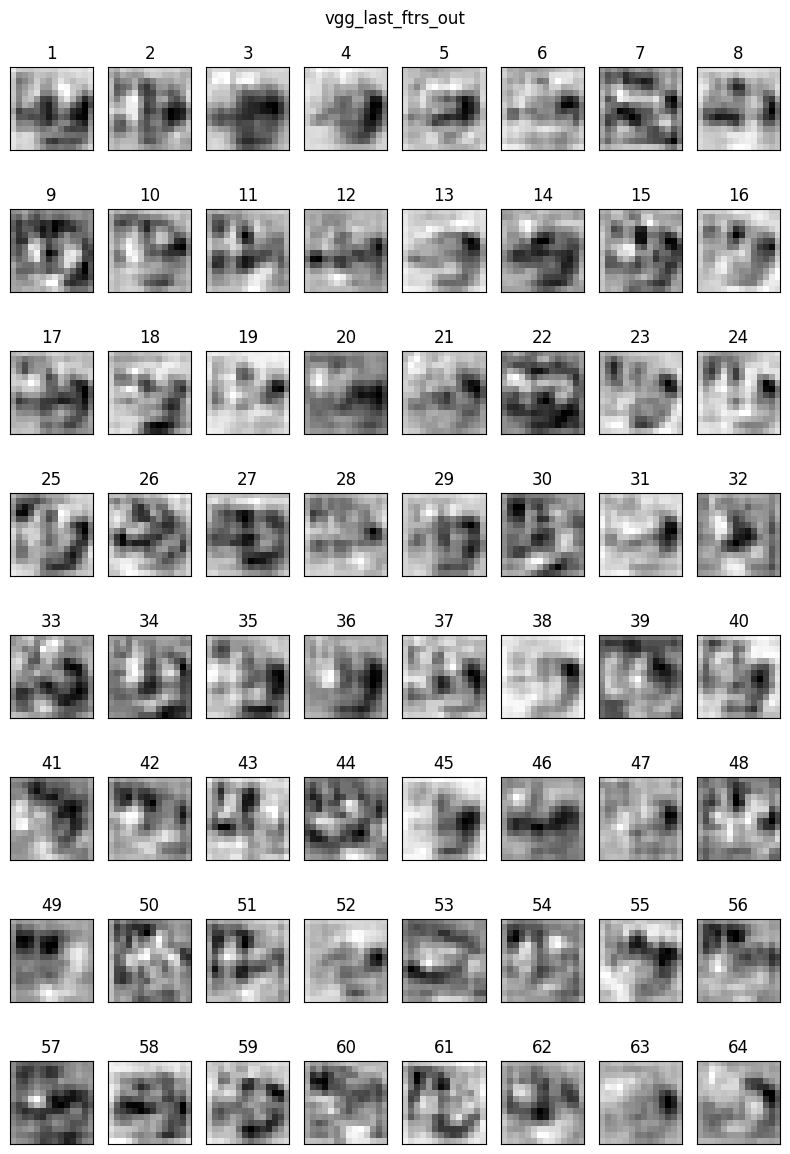

In [21]:
weights = VGG11_Weights.IMAGENET1K_V1
vgg_preprocess = weights.transforms()
vgg = vgg11(weights=weights)
viz_features_and_filters(vgg, 'results/vgg', vgg_preprocess(in_img), vgg_preprocess(out_img))

In [ ]:
weights = ResNet18_Weights.IMAGENET1K_V1
res_preprocess = weights.transforms()
resnet = resnet18(weights=weights)
resnet.eval() # uses batch norm which works diff in inference mode
# resnet requires custom code since its not setup internally like the other two models
# viz_features_and_filters(resnet, 'results/resnet', res_preprocess(in_img), res_preprocess(out_img))

In [42]:
for name, _ in resnet.named_modules():
    print(name)


conv1
bn1
relu
maxpool
layer1
layer1.0
layer1.0.conv1
layer1.0.bn1
layer1.0.relu
layer1.0.conv2
layer1.0.bn2
layer1.1
layer1.1.conv1
layer1.1.bn1
layer1.1.relu
layer1.1.conv2
layer1.1.bn2
layer2
layer2.0
layer2.0.conv1
layer2.0.bn1
layer2.0.relu
layer2.0.conv2
layer2.0.bn2
layer2.0.downsample
layer2.0.downsample.0
layer2.0.downsample.1
layer2.1
layer2.1.conv1
layer2.1.bn1
layer2.1.relu
layer2.1.conv2
layer2.1.bn2
layer3
layer3.0
layer3.0.conv1
layer3.0.bn1
layer3.0.relu
layer3.0.conv2
layer3.0.bn2
layer3.0.downsample
layer3.0.downsample.0
layer3.0.downsample.1
layer3.1
layer3.1.conv1
layer3.1.bn1
layer3.1.relu
layer3.1.conv2
layer3.1.bn2
layer4
layer4.0
layer4.0.conv1
layer4.0.bn1
layer4.0.relu
layer4.0.conv2
layer4.0.bn2
layer4.0.downsample
layer4.0.downsample.0
layer4.0.downsample.1
layer4.1
layer4.1.conv1
layer4.1.bn1
layer4.1.relu
layer4.1.conv2
layer4.1.bn2
avgpool
fc


(64, 3, 7, 7) (512, 512, 3, 3)


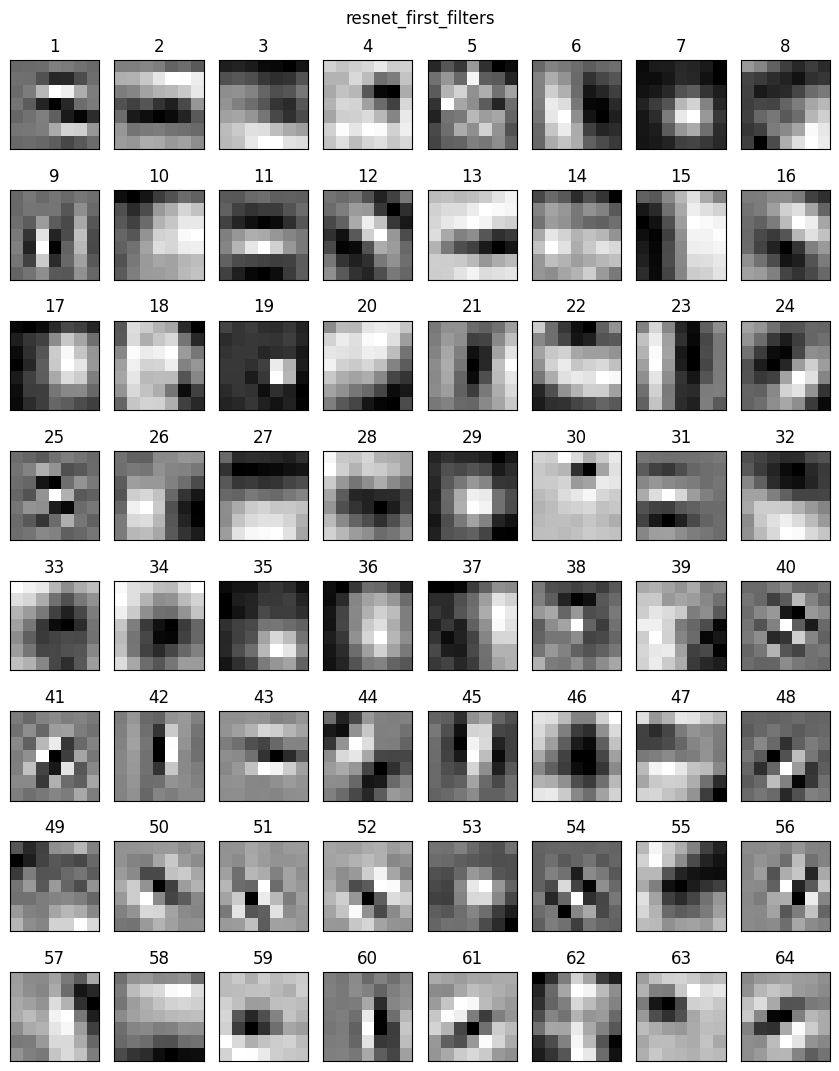

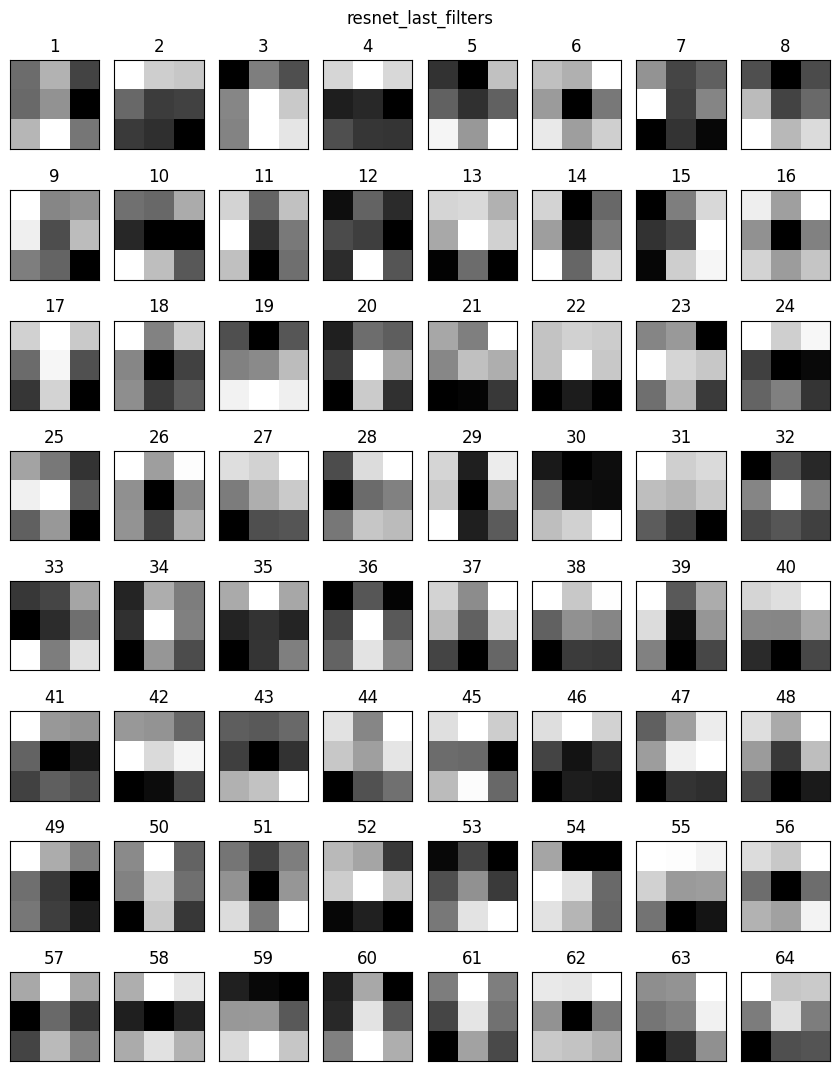

In [41]:
first_filters = resnet.conv1.weight.detach().numpy()
last_filters = resnet.layer4[1].conv2.weight.detach().numpy()
print(first_filters.shape, last_filters.shape)

save_filters(first_filters, 'results/resnet_first_filters.png')
save_filters(last_filters, 'results/resnet_last_filters.png')

/Users/vikram/.pyenv/versions/3.11.0/envs/mlsandbox/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([1, 64, 112, 112]) torch.Size([1, 512, 7, 7])


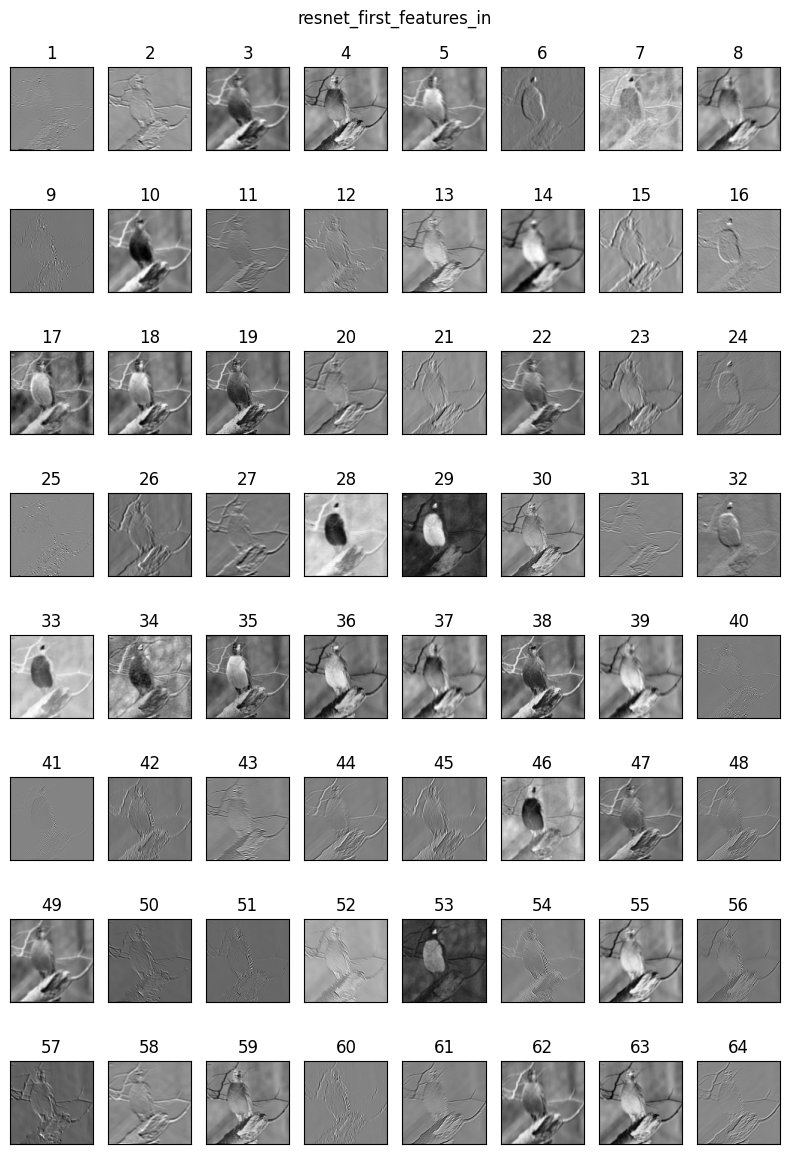

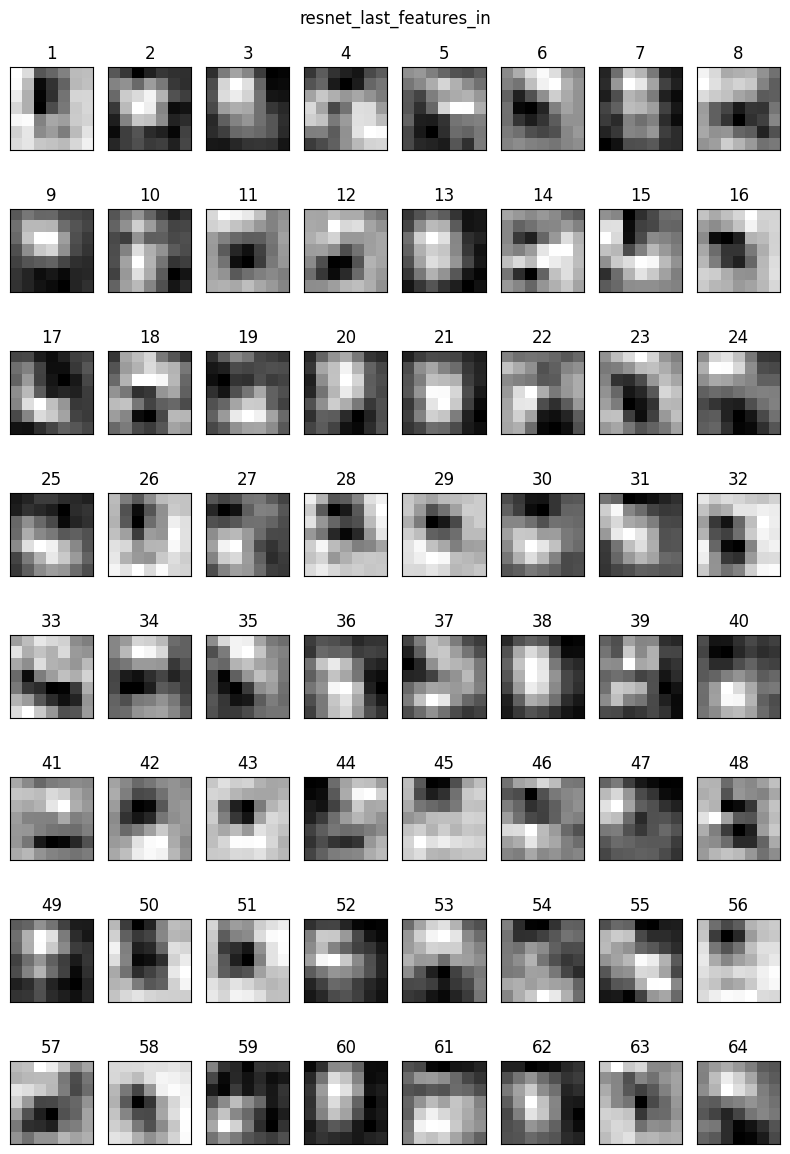

In [48]:
# https://stackoverflow.com/questions/55083642/extract-features-from-last-hidden-layer-pytorch-resnet18#55098265
from torchvision.models.feature_extraction import create_feature_extractor
# the named modules that correspond to the first and last conv2d layers
return_nodes = {'conv1': 'conv1', 'layer4.1.conv2': 'layer4.1.conv2'}
feature_extractor = create_feature_extractor(resnet, return_nodes=return_nodes)

in_features = feature_extractor(res_preprocess(in_img.unsqueeze(0)))
print(in_features['conv1'].shape, in_features['layer4.1.conv2'].shape)

in_first_features = in_features['conv1'].squeeze()
in_last_features = in_features['layer4.1.conv2'].squeeze()

save_features(in_first_features, 'results/resnet_first_features_in.png', 64)
save_features(in_last_features, 'results/resnet_last_features_in.png', 64)

torch.Size([1, 64, 112, 112]) torch.Size([1, 512, 7, 7])


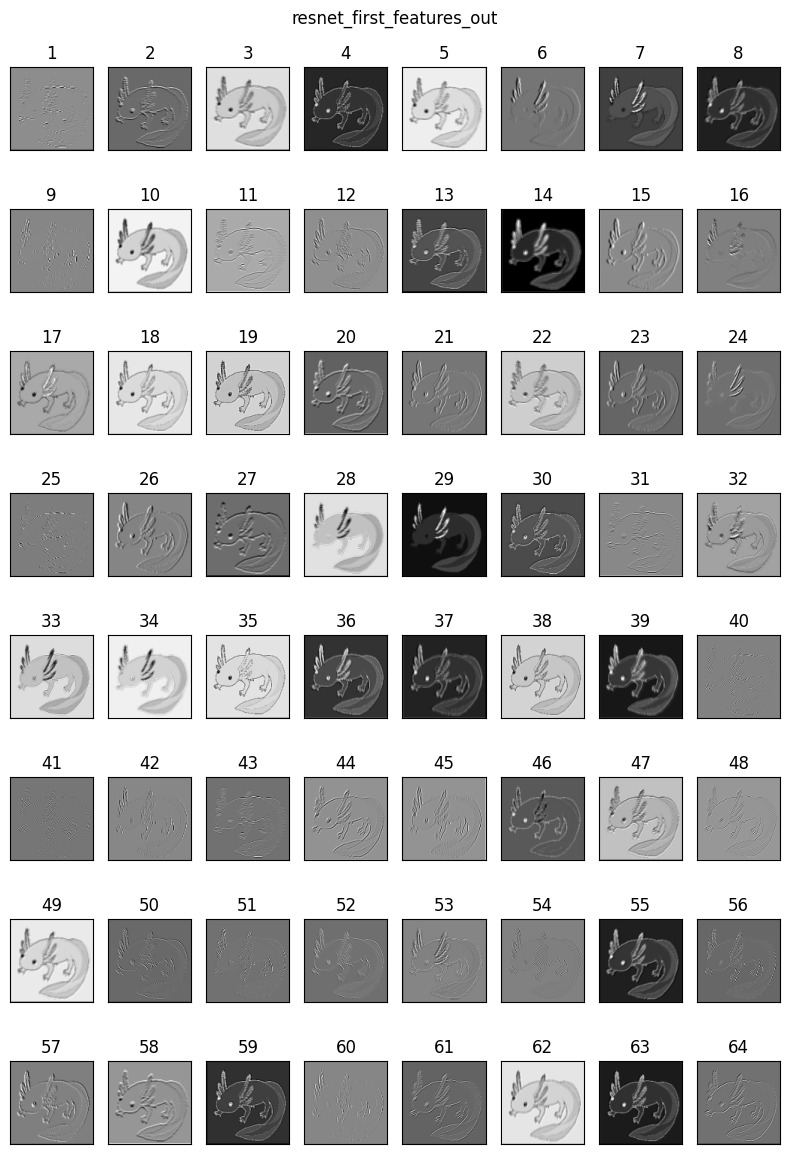

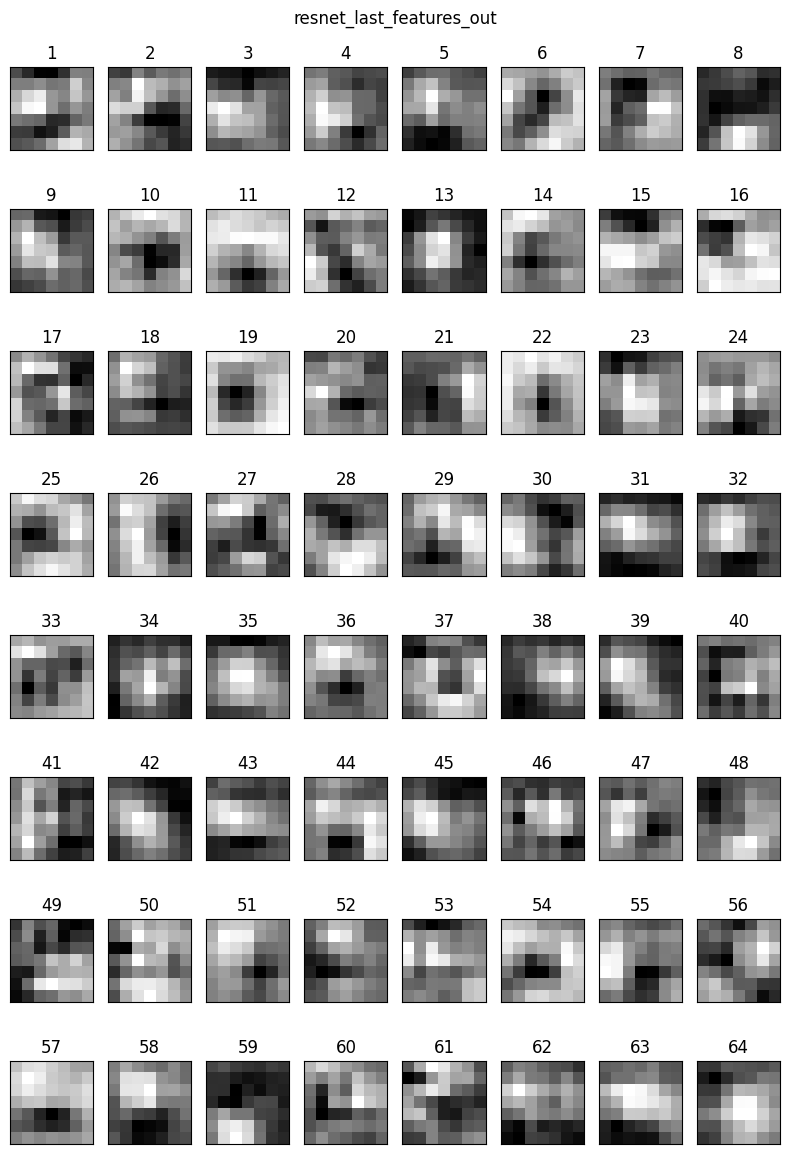

In [50]:
out_features = feature_extractor(res_preprocess(out_img.unsqueeze(0)))
print(out_features['conv1'].shape, out_features['layer4.1.conv2'].shape)

out_first_features = out_features['conv1'].squeeze()
out_last_features = out_features['layer4.1.conv2'].squeeze()

save_features(out_first_features, 'results/resnet_first_features_out.png', 64)
save_features(out_last_features, 'results/resnet_last_features_out.png', 64)